#### Analyzing New York City High School Data

Purpose of this project is to explore realtionship between SAT scores and demographic factors in New York City public schools. SAT is a test that high school seniors in the U.S. take every year. High average SAT scores are usually indicative of a good school

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import re
%matplotlib inline

In [3]:
ap_2010 = pd.read_csv('2010_AP.csv')
class_size = pd.read_csv('Class_Size.csv')
demographics = pd.read_csv('Demographics.csv')
graduation = pd.read_csv('Graduation.csv')
hs_directory = pd.read_csv('High_School_Directory.csv')
sat_results = pd.read_csv('SAT_Results.csv')

In [4]:
sat_results.head()


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [5]:
hs_directory.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...


In [6]:
graduation.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


In [7]:
demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [8]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [9]:
ap_2010.head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


#### Looking at the data, we can tell that 'DBN' in sat_results data is a combination of 'CSD' and 'School Code' columns in class_size data
#### Combining 'CSD' and 'School Code' columns in class_size

In [10]:
all_survey = pd.read_csv('masterfile11_gened_final.txt', delimiter='\t', encoding='windows-1252')

d75_survey = pd.read_csv('masterfile11_d75_final.txt', delimiter='\t', encoding='windows-1252')

In [11]:
survey = pd.concat([all_survey, d75_survey], axis=0)

survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
survey['DBN'] = survey['dbn']
survey = survey.filter(items=['DBN', 'rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11'])

In [13]:
hs_directory['DBN'] = hs_directory['dbn']

def pad_csd(num):
    csd_string = str(num)
    if len (csd_string) > 1:
        return csd_string
    else:
        return '0' + csd_string
class_size['padded_csd'] = class_size['CSD'].apply(pad_csd)
class_size['DBN'] = class_size['padded_csd'] + class_size['SCHOOL CODE']

In [14]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

for i  in cols:
    sat_results[i] = pd.to_numeric(sat_results[i], errors='coerce')
    #sat_results['sat_score'] = pd.to_numeric(sat_results[cols[0]]) + pd.to_numeric(sat_results[cols[1]]) + pd.to_numeric(sat_results[cols[2]])
    
    def find_lat(loc):
        coords = re.findall('\(.+, .+\)', loc)
        lat = coords[0].split(',')[0].replace('(','')
        return lat
    
    def find_lon(loc):
        coords = re.findall('\(.+, .+\)', loc)
        lon = coords[0].split(',')[1].replace(')','').strip()
        return lon
sat_results['sat_score'] = pd.to_numeric(sat_results[cols[0]]) + pd.to_numeric(sat_results[cols[1]]) + pd.to_numeric(sat_results[cols[2]])
        
    
hs_directory['lat'] = hs_directory['Location 1'].apply(find_lat)

hs_directory['lon'] = hs_directory['Location 1'].apply(find_lon)

hs_directory['lat'] = pd.to_numeric(hs_directory['lat'], errors='coerce')
hs_directory['lon'] = pd.to_numeric(hs_directory['lon'], errors='coerce')
        

In [15]:
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)


demographics = demographics[demographics["schoolyear"] == 20112012]

graduation = graduation[graduation["Cohort"] == "2006"]
graduation = graduation[graduation["Demographic"] == "Total Cohort"]

#### Converting AP scores to numeric

In [16]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for i in cols:
    ap_2010[i] = pd.to_numeric(ap_2010[i], errors='coerce')

#### Combining the datasets

In [17]:
combined = sat_results.merge(ap_2010, on='DBN', how='left')
combined = combined.merge(graduation, on='DBN', how='left')

to_merge = [class_size, demographics, survey, hs_directory]

for i in to_merge:
    combined = combined.merge(i, on='DBN', how='inner')
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

In [18]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0.0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0.0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0.0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


In [19]:
combined.corr()

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,Total Regents - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
SAT Critical Reading Avg. Score,1.000000,0.929221,0.982826,0.986820,0.490283,0.483479,0.441813,0.289710,0.584661,0.659326,...,NaN,NaN,NaN,-0.059377,-0.071264,0.054326,0.050692,0.042381,-0.119993,-0.126479
SAT Math Avg. Score,0.929221,1.000000,0.931385,0.972643,0.545646,0.533239,0.469456,0.379012,0.541928,0.637366,...,NaN,NaN,NaN,-0.059206,-0.061451,0.054875,0.079725,0.072564,-0.134572,-0.120055
SAT Writing Avg. Score,0.982826,0.931385,1.000000,0.987771,0.501648,0.495321,0.451790,0.282701,0.598018,0.672042,...,NaN,NaN,NaN,-0.060942,-0.092805,0.033909,0.020753,0.013163,-0.100551,-0.143850
sat_score,0.986820,0.972643,0.987771,1.000000,0.523140,0.514333,0.463245,0.325144,0.584234,0.667603,...,NaN,NaN,NaN,-0.060919,-0.076151,0.048737,0.052232,0.044427,-0.121029,-0.132222
AP Test Takers,0.490283,0.545646,0.501648,0.523140,1.000000,0.992192,0.901513,0.602802,0.240070,0.301233,...,NaN,NaN,NaN,0.004111,0.061276,0.091317,0.107707,0.104981,-0.104464,-0.053121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Census Tract,0.054326,0.054875,0.033909,0.048737,0.091317,0.095639,0.084971,0.055696,0.070918,0.075438,...,NaN,NaN,NaN,0.183482,0.039992,1.000000,0.177204,0.180936,-0.105527,0.276771
BIN,0.050692,0.079725,0.020753,0.052232,0.107707,0.088725,0.028227,0.266026,0.002023,-0.002685,...,NaN,NaN,NaN,0.088865,0.783021,0.177204,1.000000,0.996551,-0.573413,0.263042
BBL,0.042381,0.072564,0.013163,0.044427,0.104981,0.086072,0.026998,0.267190,-0.011794,-0.016293,...,NaN,NaN,NaN,0.076719,0.783850,0.180936,0.996551,1.000000,-0.563403,0.260492
lat,-0.119993,-0.134572,-0.100551,-0.121029,-0.104464,-0.092747,-0.049501,-0.173088,-0.045115,-0.069427,...,NaN,NaN,NaN,-0.157286,-0.730447,-0.105527,-0.573413,-0.563403,1.000000,0.280425


#### Adding a School District Column for Mapping

In [20]:
def get_first_two_chars(dbn):
    return dbn[0:2]
combined['school_dist'] = combined['DBN'].apply(get_first_two_chars)

#### Finding Correlations

In [21]:
satscore_corr = combined.corr()['sat_score']
print(satscore_corr)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
Census Tract                       0.048737
BIN                                0.052232
BBL                                0.044427
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 85, dtype: float64


#### Plotting Survey Correlations

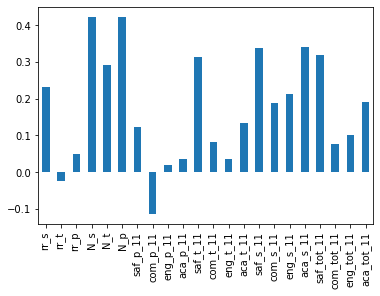

In [27]:
survey_filter = ['rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']
combined.corr()['sat_score'][survey_filter].plot.bar()

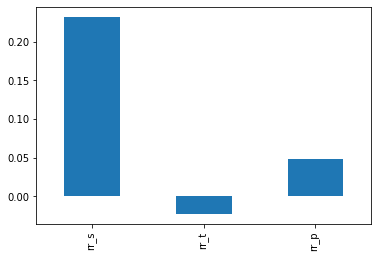

In [26]:
survey_response = ['rr_s', 'rr_t', 'rr_p']
combined.corr()['sat_score'][survey_response].plot.bar()

There are high positive correlations between sat_score and rr_s, N_s, N_t, N_p, sat_t_11, saf_s_11, aca_s_11, saf_tot_11, aca_tot_11.
rr_s(survey student response rate) correlating with sat_score makes sense because students who did well in exam/test more likely to fill out surveys.
saf_s_11 and saf_t_11 (how students and teachers perceived safety) correlated highly with sat_score. This makes sense because it is difficult to teach or learn in an unsafe environment.

#### Racial Differences in SAT scores

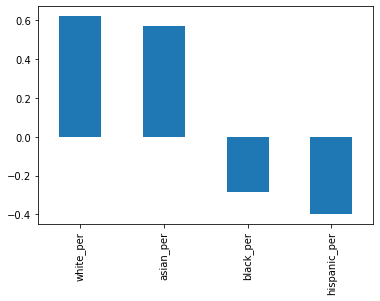

In [22]:
race = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
combined.corr()['sat_score'][race].plot.bar()

white_per and asian_per(white and asian students at a school) correlates positively with sat_score; whereas black_per and hispanic_per (black and hispanic students at a school) correlates negatively with sat_score

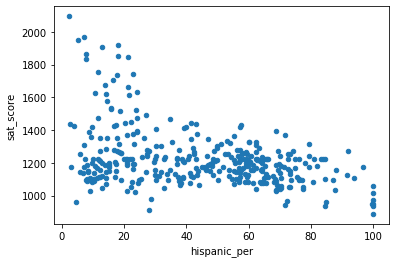

In [23]:
combined.plot.scatter('hispanic_per', 'sat_score')

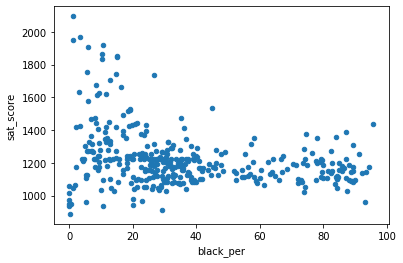

In [24]:
combined.plot.scatter('black_per', 'sat_score')

In [25]:
print(combined[(combined['hispanic_per'] <= 10) & combined['sat_score'] >= 1200]['SCHOOL NAME'])

Series([], Name: SCHOOL NAME, dtype: object)


#### Exploring Differences in SAT Score Based on Gender

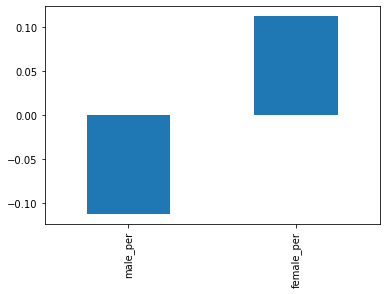

In [26]:
gender = ['male_per','female_per']
combined.corr()['sat_score'][gender].plot.bar()

From the plot above we can see that a percentage of females at a school positively correlates with SAT score. whereas percentage of males at a school negatively correlates with SAT scores.

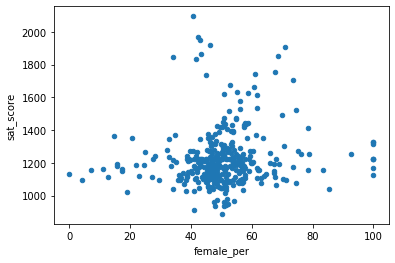

In [27]:
combined.plot.scatter('female_per', 'sat_score')

Based on the plot above, it doesn't seem to be a real correlation between sat_score and female_per. But there is a cluster of schools with high percentage of females. 

In [29]:
print(combined[(combined['female_per'] > 60)& (combined['sat_score']>1700)]['SCHOOL NAME'])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


##### These schools are selective liberal arts schools that have high academic standards.